In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

## Preprocessing

In [2]:
smeb_df= pd.read_csv('SMEB_sbd_level 2019-10-29 .csv')
smeb_df.head()

,Unnamed: 0,Month,region,q_gov,q_district,q_sbd,q_bread_price_per_8pieces,q_bulgur_price_per_kilo,q_chicken_price_per_kilo,q_eggs_price_per_30eggs,...,smeb_food,smeb_nfi,smeb_cookingfuels,trans_fuel,smeb_complete,smeb_only_missing_water,smeb_total_float,smeb_sanswater_float,smeb_incomplete,smeb_usd
0,1,April 18,northeast,SY02,SY0205,SY020500,100.0,250.0,690.0,900.0,...,42733.0,3674.00,2500.0,212.000000,True,False,58447.21250,55327.02500,54369.50,123.960154
1,2,April 18,northeast,SY02,SY0206,SY020600,80.0,220.0,825.0,800.0,...,40592.5,5306.00,2625.0,170.666667,True,False,57591.51250,55172.76250,53573.50,129.128952
2,3,April 18,northeast,SY02,SY0206,SY020601,80.0,240.0,850.0,850.0,...,40572.5,5180.25,2750.0,61.000000,True,False,58090.58125,55042.95625,54037.75,129.377687
3,4,April 18,northeast,SY02,SY0206,SY020602,80.0,225.0,800.0,850.0,...,41717.5,5134.25,2750.0,61.000000,True,False,57546.63125,54934.38125,53531.75,123.490625
4,5,April 18,northeast,SY08,SY0800,SY080000,125.0,275.0,775.0,900.0,...,42550.0,5125.00,2000.0,90.000000,False,True,NaN,55550.62500,51675.00,NaN


Removing price columns and changing date format so that it follows the calender order and not treat it as a string

In [3]:
smeb_only_df = smeb_df.copy()

for col in smeb_df.columns:
    if ("price" in col) or ("nonstandard" in col):
        smeb_only_df.drop(columns=[col], inplace=True)

smeb_only_df['Month'] = smeb_only_df['Month'].apply(lambda x : pd.to_datetime(x, format = "%B %y", errors='ignore'))
smeb_only_df['Month'] = smeb_only_df['Month'].apply(lambda x : pd.to_datetime(x, format = "%b %y", errors='ignore'))

In [5]:
smeb_only_df.head()

,Unnamed: 0,Month,region,q_gov,q_district,q_sbd,q_xrate_usdsyp_sell,q_smeb_bread,q_smeb_bulgur,q_smeb_chicken,...,smeb_food,smeb_nfi,smeb_cookingfuels,trans_fuel,smeb_complete,smeb_only_missing_water,smeb_total_float,smeb_sanswater_float,smeb_incomplete,smeb_usd
0,1,2018-04-01 00:00:00,northeast,SY02,SY0205,SY020500,471.5,3700.0,3750.0,4140.0,...,42733.0,3674.00,2500.0,212.000000,True,False,58447.21250,55327.02500,54369.50,123.960154
1,2,2018-04-01 00:00:00,northeast,SY02,SY0206,SY020600,446.0,2960.0,3300.0,4950.0,...,40592.5,5306.00,2625.0,170.666667,True,False,57591.51250,55172.76250,53573.50,129.128952
2,3,2018-04-01 00:00:00,northeast,SY02,SY0206,SY020601,449.0,2960.0,3600.0,5100.0,...,40572.5,5180.25,2750.0,61.000000,True,False,58090.58125,55042.95625,54037.75,129.377687
3,4,2018-04-01 00:00:00,northeast,SY02,SY0206,SY020602,466.0,2960.0,3375.0,4800.0,...,41717.5,5134.25,2750.0,61.000000,True,False,57546.63125,54934.38125,53531.75,123.490625
4,5,2018-04-01 00:00:00,northeast,SY08,SY0800,SY080000,465.0,4625.0,4125.0,4650.0,...,42550.0,5125.00,2000.0,90.000000,False,True,NaN,55550.62500,51675.00,NaN


# Correlation Analysis

In this section, we will have a general overview of correlations between similar items grouped by Month

## Exploration

Just for exploration, we first stick to lentils and rice. First we check the number of entries in each month, for lentiles and rice

In [6]:
smeb_only_df.groupby('Month')['q_smeb_lentils', 'q_smeb_rice'].count()

,q_smeb_lentils,q_smeb_rice
Month,,
2017-11-01 00:00:00,63,63
2017-12-01 00:00:00,70,70
2018-01-01 00:00:00,31,31
2018-02-01 00:00:00,62,63
2018-03-01 00:00:00,54,55
2018-04-01 00:00:00,64,64
2018-05-01 00:00:00,64,64
2018-06-01 00:00:00,63,63
2018-07-01 00:00:00,47,47


Instead of calculating correlation over a months (since, the values within a month are not in order of time), we take the mean of the prices for each month, and plot against each other.

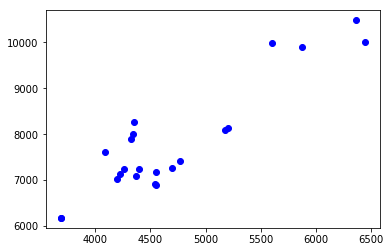

In [12]:
sum_monthly = smeb_only_df.groupby('Month')['q_smeb_lentils', 'q_smeb_rice'].mean()
plt.plot(sum_monthly['q_smeb_lentils'], sum_monthly['q_smeb_rice'], 'bo')

The above plot indicates fair amount of positive correlation between rice and lentils over the 22 months

## Wholesome Analysis

Now, instead of just considering rice and lentils, we would like to view the correlation between all pairs of smeb values. For this, we define the following function called "correlations" that takes the mean price in each month and list of items as inputs and returns a dataframe with correlation between all pairs of items

In [5]:
def correlations(mean_monthly, item_list):
    n = len(item_list)
    col_names = item_list
    df_corr = pd.DataFrame(columns=["Item 1", "Item 2", "Corr"])
    df_corr["Item 1"] = np.repeat(item_list, n)
    df_corr["Item 2"] = item_list*n
    for i in range(n):
        for j in range(i,n):
            if not i==j:
                try:
                    df_corr.iloc[i*n+j, 2] = mean_monthly[item_list[i]].corr(mean_monthly[item_list[j]])
                except:
                    print(item_list[i], item_list[j])
    return df_corr
    

We first check if there are certain pairs of items that are significantly negatively correlated. However, we do not find any!

In [10]:
mean_monthly = smeb_only_df.groupby('Month').mean()
item_list = list(smeb_only_df.columns[6:39])
correlations(mean_monthly, item_list).sort_values('Corr').head()

,Item 1,Item 2,Corr
485,q_smeb_gbdata,q_smeb_potatoes,-0.415446
345,q_smeb_isoap,q_smeb_xrate,-0.371411
10,q_xrate_usdsyp_sell,q_smeb_isoap,-0.371411
477,q_smeb_gbdata,q_smeb_xrate,-0.341471
14,q_xrate_usdsyp_sell,q_smeb_gbdata,-0.341471


We sort the correlation between pairs in descending order and plot the **top 10** correlated pairs

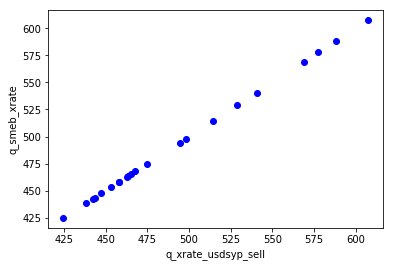

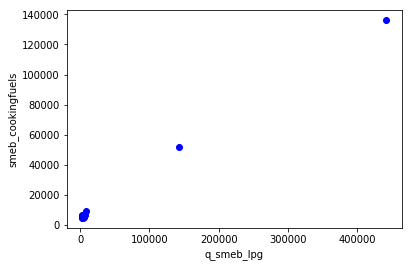

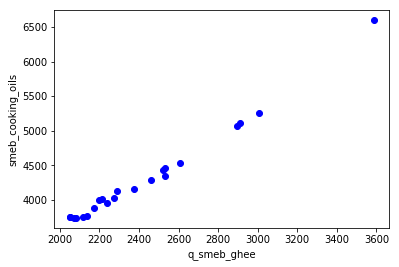

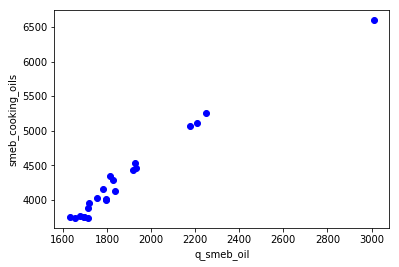

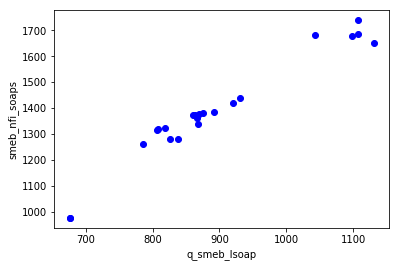

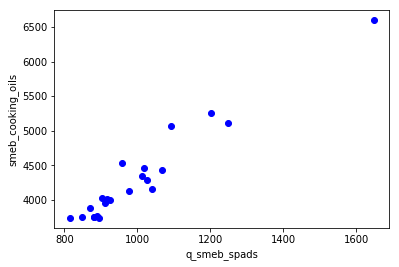

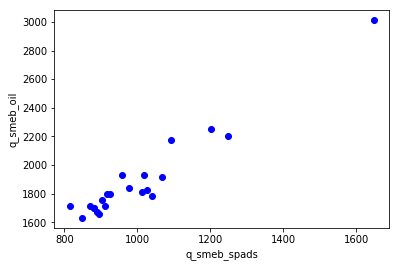

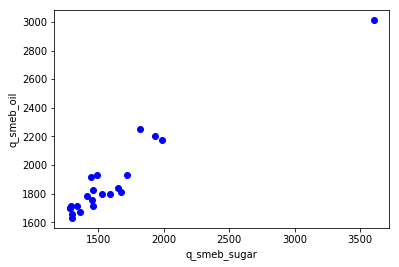

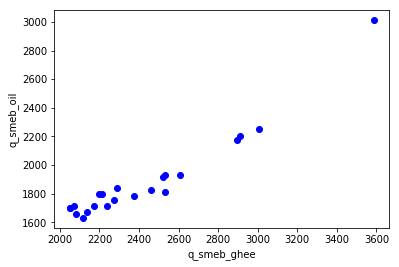

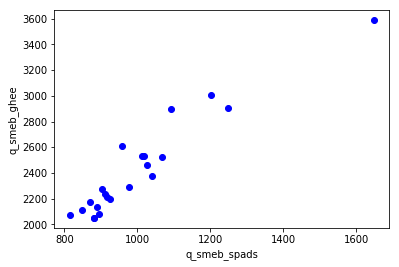

In [14]:
df_corr = correlations(mean_monthly, item_list).sort_values('Corr', ascending = False)

for i in range(10):
    item1 = df_corr.iloc[i,0]
    item2 = df_corr.iloc[i,1]
    x = smeb_only_df.groupby('Month')[item1].mean()
    y = smeb_only_df.groupby('Month')[item2].mean()
    plt.plot(x, y, 'bo')
    plt.xlabel(item1)
    plt.ylabel(item2)
    plt.show()

The above plots indicate some expected correlations, such as ghee and oil, cooking fuel and lpg, etc. however, we have some suprising (at least to us) correlations between sanitary pads and cooking oil

We also observe an outlier in most of the above plot. We check if the outliers in the above plots belong to the same month

In [15]:
for i in range(10):
    item1 = df_corr.iloc[i,0]
    item2 = df_corr.iloc[i,1]
    x = list(smeb_only_df.groupby('Month')[item1].mean())
    y = smeb_only_df.groupby('Month')[item2].mean()
    print(x.index(max(x)))

20
1
0
0
19
0
0
0
0
0


The above results shows, indeed the outlier in most cases is the first month (Index 0), i.e. November 2017. One needs to verfiy if there are some reasons for prices to be particularly high in that month

# Conclusion

The above analysis reveal that there are certain products whose prices tend to correlate "significantly". This information can be particularly useful in cases when data for one of the items is missing and we would still like to draw some inference (say volatility) of that item.

It is important to note that we aggregated the items by months and took their mean value, disregarding its location. However, it would be interesting to study if such correlation exists across all levels (gov, sbd, districts, towns) or do they break in certain areas.